<a href="https://colab.research.google.com/github/NicolasErices/HStackAndVstackTest/blob/master/liquidaci%C3%B3n_autodetected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install pytesseract
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pdf2image
!apt-get install poppler-utils
import os
from google.colab.patches import cv2_imshow
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import json
from pdf2image import convert_from_path

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=f2b2b97f013e8ff11c521924ce7d0cbacb1a0acbd9830a3143d94a67a9d0731c
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [ ]:
#subir las liquidaciones y dejarlos en la carpeta de liquidaciones que se crea
os.mkdir("liquidaciones") #creo la carpeta
uploaded = files.upload() # subo el archivo
uploaded_files = list(uploaded.keys()) #enlisto las liquidaciones
for uploaded_file in uploaded_files: #recorro las liquidaciones (cantidad)
  !mv $uploaded_file liquidaciones/$uploaded_file #MV las liquidaciones
  print("Nombre Liquidación:", uploaded_file)

#procesar y transformar las liquidaciones a imagenes
images = convert_from_path('liquidaciones/'+uploaded_file, 500)
for i, image in enumerate(images):
    fname = str(i)+'-liquidacion.png'
    print(fname)
    image.save(fname, "PNG")

MessageError: ignored

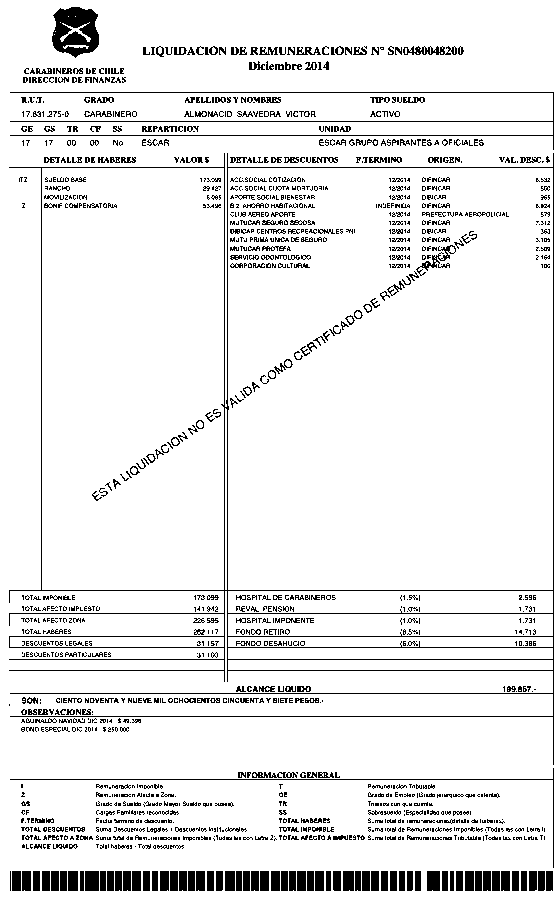

In [ ]:
import pytesseract
image = cv2.imread('01-carabinero.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(threshold_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
 #configuring parameters for tesseract
custom_config = r'--oem 3 --psm 6'
# now feeding image to tesseract
details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config=custom_config, lang='eng')
print(details.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


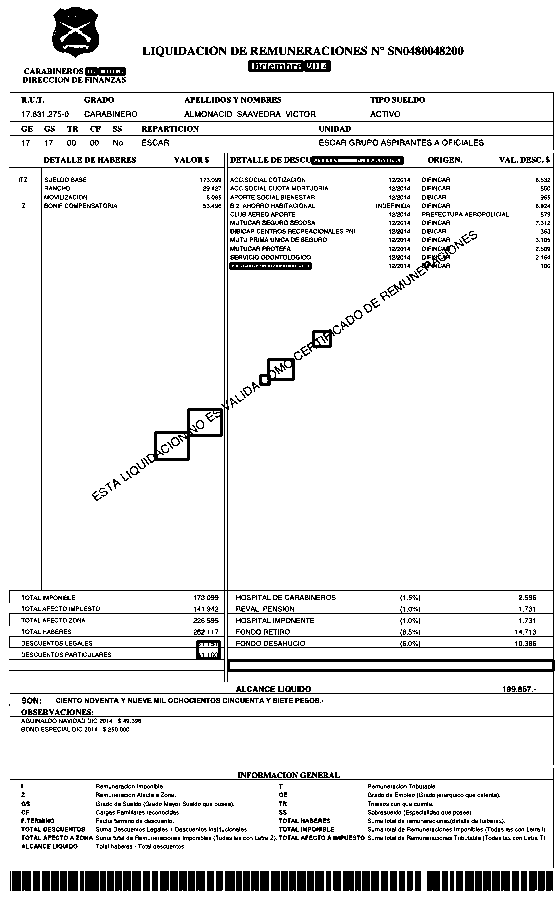

In [ ]:
total_boxes = len(details['text'])
for sequence_number in range(total_boxes):
	if int(details['conf'][sequence_number]) >30:
		(x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
		threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
# display image
cv2_imshow(threshold_img)
# Maintain output window until user presses a key
cv2.waitKey(0)
# Destroying present windows on screen
cv2.destroyAllWindows()

In [ ]:
parse_text = []
word_list = []
last_word = ''
for word in details['text']:
  if word!='':
    word_list.append(word)
    last_word = word
    if (last_word!='' and word == '') or (word==details['text'][-1]):
      parse_text.append(word_list)
      word_list = []
print(parse_text)

[['CARABINEROS', 'DE', 'CULE', 'Diciembre', '2014', 'emus', 'yaans', 'Jaman', 'ee', 'eee', 'enaes', 'tas', 'Ege', '5', 'oe', '.', '6', 'c', 'at', '&', 'oe', 'é', 'wr', '0', 'or', 's', 's', '&', 'SeSEDEL', 'EES', 'Ss', '|', '(OETENE(SAEANEELORAREUORAAAOOHOSOOGMCOQEDUNG', 'UUDOEROREB']]


In [ ]:
data = pd.DataFrame({
  "text":[parse_text],
})
data
result = data.to_json(orient="split")
parsed = json.loads(result)
JSON_CARABINERO = json.dumps(parsed, sort_keys=True, indent=4, separators=(',', ': '))
print(JSON_CARABINERO)

{
    "columns": [
        "text"
    ],
    "data": [
        [
            [
                [
                    "CARABINEROS",
                    "DE",
                    "CULE",
                    "Diciembre",
                    "2014",
                    "emus",
                    "yaans",
                    "Jaman",
                    "ee",
                    "eee",
                    "enaes",
                    "tas",
                    "Ege",
                    "5",
                    "oe",
                    ".",
                    "6",
                    "c",
                    "at",
                    "&",
                    "oe",
                    "\u00e9",
                    "wr",
                    "0",
                    "or",
                    "s",
                    "s",
                    "&",
                    "SeSEDEL",
                    "EES",
                    "Ss",
                    "|",
                    "(OETENE(SAEANEEL

In [ ]:
import csv
with open(result_text.txt',  'w', newline="") as file:
  csv.writer(file, delimiter=" ").writerows(parse_text)

NameError: ignored